# 8. Hough transform – line and circle detection


In [87]:
import cv2
import math
import numpy as np

from matplotlib import pyplot as plt

def show_image(image, title="", cmap=""):
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.show()

### **b)** Use `HoughLines()` to detect lines in images like those in figure 1.a and 1.b; try different parameter values; draw the detected lines on the image. 


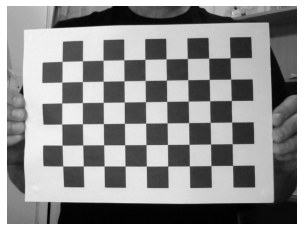

In [88]:
image = cv2.imread("Images/chessboard_03.jpg", 0)

show_image(image)

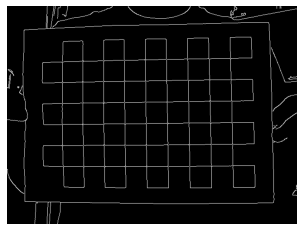

In [89]:
canny = cv2.Canny(image, 50, 200)

show_image(canny)

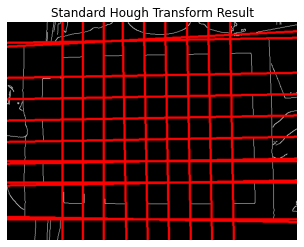

In [90]:
distance_resolution = 1
angle_resolution = np.pi / 180
min_num_votes = 150

lines = cv2.HoughLines(canny, distance_resolution, angle_resolution, min_num_votes, None, 0, 0)
copy = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)

# Drawing the lines
def draw_lines(copy):
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
            pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
            cv2.line(copy, pt1, pt2, (255, 0, 0), 3)

draw_lines(copy)

show_image(copy, title="Standard Hough Transform Result")

### **c)** Use `HoughLinesP()` to detect line segments in the same images that you used in the previous problem; try different parameter values; draw the detected line segments on the image.

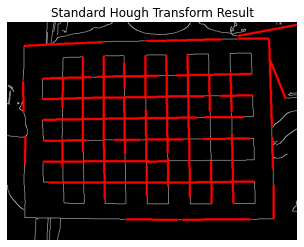

In [91]:
distance_resolution = 1
angle_resolution = np.pi / 180
min_num_votes = 50

lines = cv2.HoughLinesP(canny, distance_resolution, angle_resolution, min_num_votes, None, 50, 10)
copy = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)

if lines is not None:
    for i in range(0, len(lines)):
        l = lines[i][0]
        cv2.line(copy, (l[0], l[1]), (l[2], l[3]), (255, 0, 0), 3)

show_image(copy, title="Standard Hough Transform Result")

### **d)** Use `HoughCircles()` to detect the coins present in images like those in figure 1.c and 1.d (without or with superposition among the coins).

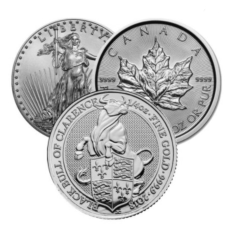

In [92]:
image = cv2.imread("Images/coins_02.jpg", 0)

show_image(image)

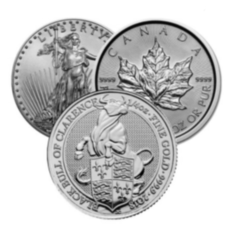

In [93]:
image = cv2.blur(image, (3, 3))
show_image(image)

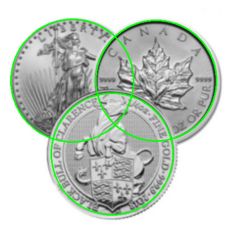

In [96]:

copy = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

detection_method = cv2.HOUGH_GRADIENT  # Corresponds to the Canny filter
resolution_flag = 1                    # Same resolution as the original image
min_distance = 20                      # Between the centers of the detected circles

# param1 and param2 are the thresholds passed to the detection method
circles = cv2.HoughCircles(image, detection_method, resolution_flag, min_distance, param1=200, param2=100, minRadius=100, maxRadius=0)
circles = np.uint16(np.around(circles))

# Drawing the resulting circles
for i in circles[0, :]:
    cv2.circle(copy, (i[0], i[1]), i[2], (0, 255, 0), 2)

show_image(copy)